In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV


In [25]:
# Pre-Loading
y_train = pd.read_csv("FE results/y_train.csv")
y_train = y_train.drop(columns=['Unnamed: 0'])
y_test = pd.read_csv("FE results/y_test.csv")
y_test = y_test.drop(columns=['Unnamed: 0'])


# Load Data
X_train = pd.read_csv("FE results/Train_original.csv")
Train_date = X_train['Date']
X_train = X_train.drop(columns=['Unnamed: 0', 'Date'])
X_test = pd.read_csv("FE results/Test_original.csv")
Test_date = X_test['Date']
X_test = X_test.drop(columns=['Unnamed: 0', 'Date'])


In [26]:
def Model_training(model, X_train, y_train, X_test, y_test, pred_list):
    result = {}
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    pred_list.append(np.concatenate((train_pred, test_pred), axis=0))
    result['Train MAE'] = mean_absolute_error(y_train, train_pred)
    result['Train RMSE'] = np.sqrt(mean_squared_error(y_train, train_pred))
    result['Test MAE'] = mean_absolute_error(y_test, test_pred)
    result['Test RMSE'] = np.sqrt(mean_squared_error(y_test, test_pred))

    if isinstance(model, GridSearchCV):
        result['Best Params'] = model.best_params_

    return result

In [27]:
def Multiple_models(X_train, y_train, X_test, y_test, cv, verbose):
    Results = pd.DataFrame(columns=['Train MAE', 'Train RMSE', 'Test MAE', 'Test RMSE'])
    pred_list = []

  

    print('\n\n# Lasso')
    pipeline_lasso = Pipeline([('regressor', Lasso())])
    params_lasso = {'regressor__alpha': [0.5], 'regressor__max_iter': [1000]}
    model_lasso = GridSearchCV(pipeline_lasso, params_lasso, cv=cv, verbose=verbose)
    result_lasso = Model_training(model_lasso, X_train, y_train, X_test, y_test, pred_list)
    Results = Results.append(result_lasso, ignore_index=True)




    Results.index = [model_name[i] for i in range(1)]
    return Results, pred_list

In [28]:
def Model_training(model, X_train, y_train, X_test, y_test, pred_list):
    result = {}
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    pred_list.append(np.concatenate((train_pred, test_pred), axis=0))
    result['Train MAE'] = mean_absolute_error(y_train, train_pred)
    result['Train RMSE'] = np.sqrt(mean_squared_error(y_train, train_pred))
    result['Test MAE'] = mean_absolute_error(y_test, test_pred)
    result['Test RMSE'] = np.sqrt(mean_squared_error(y_test, test_pred))

    if isinstance(model, GridSearchCV):
        result['Best Params'] = model.best_params_

    return result
def Multiple_models(X_train, y_train, X_test, y_test, cv, verbose):
    Results = pd.DataFrame(columns=['Train MAE', 'Train RMSE', 'Test MAE', 'Test RMSE'])
    pred_list = []
    print('\n\n# Lasso')
    pipeline_lasso = Pipeline([('regressor', Lasso())])
    params_lasso = {'regressor__alpha': [0.5], 'regressor__max_iter': [1000]}
    model_lasso = GridSearchCV(pipeline_lasso, params_lasso, cv=cv, verbose=verbose)
    result_lasso = Model_training(model_lasso, X_train, y_train, X_test, y_test, pred_list)
    Results = Results.append(result_lasso, ignore_index=True)
    Results.index = [model_name[i] for i in range(1)]
    return Results, pred_list
model_name = {0: 'Lasso'}
cv_n_splits = 5
cv = TimeSeriesSplit(n_splits=cv_n_splits)
verbose = 2
based_days = 7
next_days = 1
pred_total = {}
results_total = []
# Boruta
print('\n####### Boruta #######')
# Load Data
X_train = pd.read_csv('./FE results/Train_boruta.csv')
X_train = X_train.drop(columns=['Unnamed: 0', 'Date'])
X_test = pd.read_csv("FE results/Test_boruta.csv")
X_test = X_test.drop(columns=['Unnamed: 0', 'Date'])
# Models Training
Results, pred_list = Multiple_models(X_train, y_train, X_test, y_test, cv, verbose)
results_total.append(Results)


####### Boruta #######


# Lasso
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.0s
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.0s
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.0s
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.0s
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.0s


/Users/qinglingou/anaconda3/envs/pytorch-gpu/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.239e+02, tolerance: 4.977e+02
  model = cd_fast.enet_coordinate_descent(
/Users/qinglingou/anaconda3/envs/pytorch-gpu/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.389e+03, tolerance: 1.746e+03
  model = cd_fast.enet_coordinate_descent(
/var/folders/y5/qp48w1ln6rjgp1z1m108n5t80000gn/T/ipykernel_20762/1852133601.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Result

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

def Model_training(model, X_train, y_train, X_test, y_test, pred_list, test_dates):
    result = {}
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    pred_list.append({'predictions': np.concatenate((train_pred, test_pred), axis=0), 'test_predictions': test_pred, 'test_dates': test_dates})
    
    result['Train MAE'] = mean_absolute_error(y_train, train_pred)
    result['Train RMSE'] = np.sqrt(mean_squared_error(y_train, train_pred))
    result['Test MAE'] = mean_absolute_error(y_test, test_pred)
    result['Test RMSE'] = np.sqrt(mean_squared_error(y_test, test_pred))

    if isinstance(model, GridSearchCV):
        result['Best Params'] = model.best_params_

    return result

def Multiple_models(X_train, y_train, X_test, y_test, cv, verbose, test_dates):
    Results = pd.DataFrame()
    pred_list = []

    # Lasso
    print('\n\n# Lasso')
    pipeline_lasso = Pipeline([('regressor', Lasso())])
    params_lasso = {'regressor__alpha': [0.5], 'regressor__max_iter': [1000]}
    model_lasso = GridSearchCV(pipeline_lasso, params_lasso, cv=cv, verbose=verbose)
    result_lasso = Model_training(model_lasso, X_train, y_train, X_test, y_test, pred_list, test_dates)
    Results = pd.concat([Results, pd.DataFrame([result_lasso])], ignore_index=True)

    Results.index = ['Lasso']
    return Results, pred_list

# Main execution
cv_n_splits = 5
cv = TimeSeriesSplit(n_splits=cv_n_splits)
verbose = 2

# Load Data
print('\n####### Boruta #######')


X_train = pd.read_csv('./FE results/Train_boruta.csv')
X_train = X_train.drop(columns=['Unnamed: 0', 'Date'])
X_test = pd.read_csv("FE results/Test_boruta.csv")
X_test = X_test.drop(columns=['Unnamed: 0', 'Date'])
test_dates = pd.read_csv("FE results/Test_boruta.csv")['Date']
# Models Training
Results, pred_list = Multiple_models(X_train, y_train, X_test, y_test, cv, verbose, test_dates)
print(Results)

# Saving Predictions with Dates to CSV
if pred_list:
    test_predictions = pred_list[-1]['test_predictions']
    test_dates = pred_list[-1]['test_dates']
    predictions_df = pd.DataFrame({
        'Date': test_dates,
        'Prediction': test_predictions.flatten()
    })
    predictions_df.to_csv('test_predictions.csv', index=False)
    print("Predictions saved to 'test_predictions.csv'.")



####### Boruta #######


# Lasso
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.0s
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.1s
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.1s
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.1s
[CV] END .....regressor__alpha=0.5, regressor__max_iter=1000; total time=   0.0s
       Train MAE  Train RMSE  Test MAE  Test RMSE  \
Lasso   3.939598    6.920461  5.313829   7.053286   

                                             Best Params  
Lasso  {'regressor__alpha': 0.5, 'regressor__max_iter...  
Predictions saved to 'test_predictions.csv'.


/Users/qinglingou/anaconda3/envs/pytorch-gpu/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.239e+02, tolerance: 4.977e+02
  model = cd_fast.enet_coordinate_descent(
/Users/qinglingou/anaconda3/envs/pytorch-gpu/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.389e+03, tolerance: 1.746e+03
  model = cd_fast.enet_coordinate_descent(


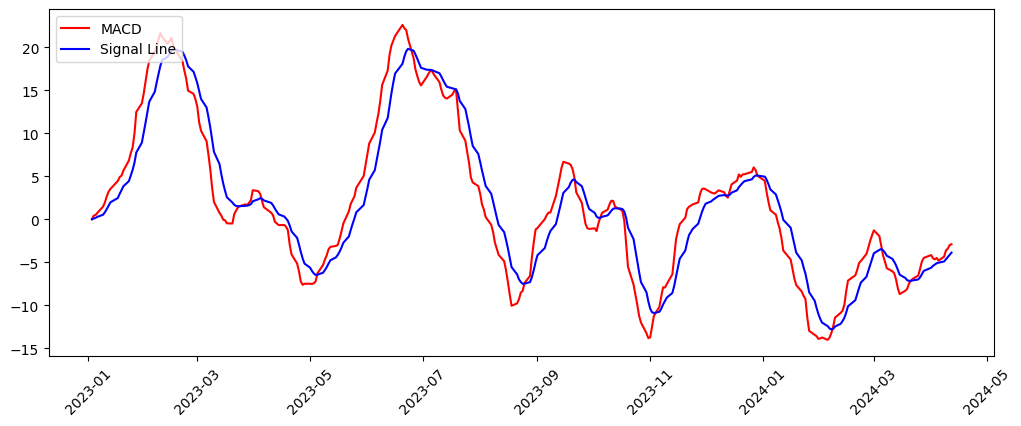

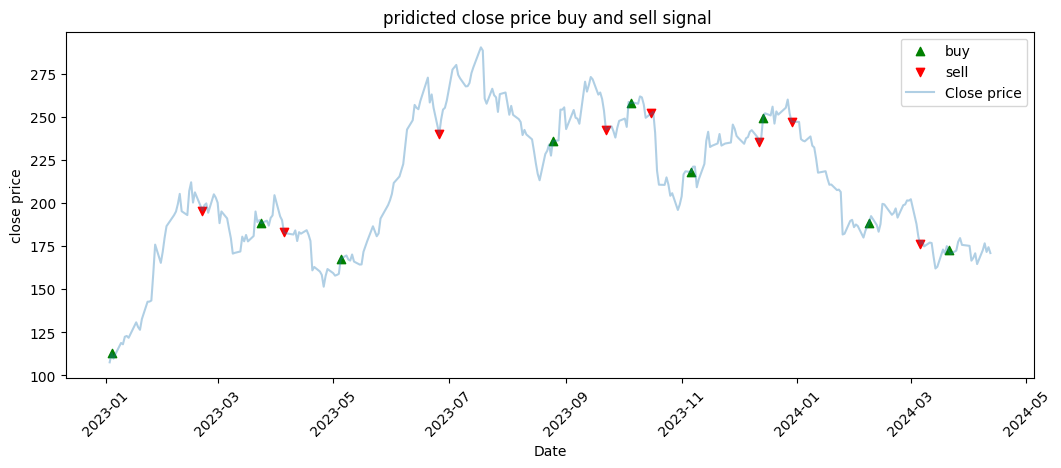

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#plt.style.use('fivethirtyeight')


df = pd.read_csv('test_predictions.csv')
#df = pd.read_csv('Result.csv', skiprows=640, nrows=295)
#df = pd.read_csv('Result.csv', skiprows=640, nrows=295)
df.columns = ['date','preds',]  

df = df.set_index(pd.DatetimeIndex(df['date'].values))

ShortEMA = df.preds.ewm(span=12, adjust=False).mean()
LongEMA  = df.preds.ewm(span=26, adjust=False).mean()
MACD     = ShortEMA - LongEMA
signal   = MACD.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'MACD',color='red')
plt.plot(df.index, signal, label = 'Signal Line',color='blue')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()


df['MACD'] = MACD
df['Signal Line'] = signal
#print(df)


def buy_sell(signal):
    buy=[]
    sell=[]
    flag=-1
    for i in range(0,len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            sell.append(np.nan)
            if flag!=1:
                buy.append(signal['preds'][i])
                flag=1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            buy.append(np.nan)
            if flag!=0:
                sell.append(signal['preds'][i])
                flag=0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return  (buy,sell)


ab= buy_sell(df)
df['buy_signal_price']=ab[0]
df['sell_signal_price']=ab[1]


plt.figure(figsize=(12.5,4.5))
plt.scatter(df.index,df['buy_signal_price'],color='green',label='buy',marker='^')
plt.scatter(df.index,df['sell_signal_price'],color='red',label='sell',marker='v')
plt.plot(df['preds'],label='Close price',alpha=0.35)
plt.title('pridicted close price buy and sell signal ')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('close price')
plt.legend()
plt.show()

In [31]:
print('Sell:', df[df['sell_signal_price'].notnull()].index.tolist())
print('Buy:', df[df['buy_signal_price'].notnull()].index.tolist())

Sell: [Timestamp('2023-02-21 00:00:00'), Timestamp('2023-04-05 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-09-22 00:00:00'), Timestamp('2023-10-16 00:00:00'), Timestamp('2023-12-12 00:00:00'), Timestamp('2023-12-29 00:00:00'), Timestamp('2024-03-06 00:00:00')]
Buy: [Timestamp('2023-01-04 00:00:00'), Timestamp('2023-03-24 00:00:00'), Timestamp('2023-05-05 00:00:00'), Timestamp('2023-08-25 00:00:00'), Timestamp('2023-10-05 00:00:00'), Timestamp('2023-11-06 00:00:00'), Timestamp('2023-12-14 00:00:00'), Timestamp('2024-02-08 00:00:00'), Timestamp('2024-03-21 00:00:00')]


In [32]:

# Initial settings
initial_capital = float(input("Enter the initial investment amount: "))
investment_percentage = float(input("Enter the percentage of available capital to use for buying: "))
capital = initial_capital
shares_held = 0
transaction_log = []

buy_dates = df[df['buy_signal_price'].notnull()].index.tolist()
sell_dates = df[df['sell_signal_price'].notnull()].index.tolist()

for i in range(min(len(buy_dates), len(sell_dates))):
    if capital > 0:
        buy_price = df.loc[buy_dates[i], 'preds']
        # Calculate investment amount for this transaction
        invest_amount = (capital * investment_percentage) / 100
        # Calculate the maximum number of shares to buy without exceeding the investable amount
        shares_to_buy = int(invest_amount / buy_price)
        total_cost = shares_to_buy * buy_price

        # If the calculated total cost exceeds the invest amount due to rounding, adjust the shares to buy
        if total_cost > invest_amount:
            shares_to_buy -= 1
            total_cost = shares_to_buy * buy_price

        capital -= total_cost
        shares_held += shares_to_buy
        transaction_log.append(f"Buy: {shares_to_buy} shares at ${buy_price:.2f}, Cost: ${total_cost:.2f}, Remaining Capital: ${capital:.2f}")

    if shares_held > 0:
        sell_price = df.loc[sell_dates[i], 'preds']
        capital_gained = shares_held * sell_price
        capital += capital_gained
        transaction_log.append(f"Sell: {shares_held} shares at ${sell_price:.2f}, Capital after sale: ${capital:.2f}")
        shares_held = 0

# Final evaluation
final_portfolio_value = capital
rate_of_return = ((final_portfolio_value - initial_capital) / initial_capital) * 100

# Print transaction details
for log in transaction_log:
    print(log)

print(f"Final Portfolio Value: ${final_portfolio_value:,.2f}")
print(f"Rate of Return: {rate_of_return:.2f}%")



Buy: 177 shares at $112.90, Cost: $19983.94, Remaining Capital: $80016.06
Sell: 177 shares at $195.67, Capital after sale: $114648.93
Buy: 121 shares at $188.36, Cost: $22791.91, Remaining Capital: $91857.02
Sell: 121 shares at $183.11, Capital after sale: $114013.26
Buy: 135 shares at $167.68, Cost: $22637.26, Remaining Capital: $91375.99
Sell: 135 shares at $240.09, Capital after sale: $123788.59
Buy: 104 shares at $236.05, Cost: $24549.02, Remaining Capital: $99239.57
Sell: 104 shares at $242.66, Capital after sale: $124475.85
Buy: 96 shares at $257.95, Cost: $24762.98, Remaining Capital: $99712.87
Sell: 96 shares at $252.13, Capital after sale: $123917.53
Buy: 113 shares at $218.01, Cost: $24634.70, Remaining Capital: $99282.83
Sell: 113 shares at $235.48, Capital after sale: $125892.41
Buy: 100 shares at $249.59, Cost: $24959.21, Remaining Capital: $100933.20
Sell: 100 shares at $247.34, Capital after sale: $125667.08
Buy: 133 shares at $188.45, Cost: $25064.26, Remaining Capital: